----------------
Bibliotecas relevantes

In [150]:
# Importando bibliotecas relevantes para o projeto
import numpy as np
import pandas as pd
import seaborn as sns
import math
from matplotlib import pyplot as plt
from ydata_profiling import ProfileReport
import plotly.express as px

--------------------------
Importando o dataframe, visualização dos dados e ajustes iniciais


In [151]:
#Importando o csv com o dataframe
#Parse nas datas
#Conferindo os data types de cada coluna
dfBase = pd.read_csv('DataSets/ofertas_relampago.csv', parse_dates=['OFFER_START_DATE','OFFER_START_DTTM','OFFER_FINISH_DTTM'],keep_default_na=False, na_values = [''])
dfBase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48746 entries, 0 to 48745
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   OFFER_START_DATE           48746 non-null  datetime64[ns]     
 1   OFFER_START_DTTM           48746 non-null  datetime64[ns, UTC]
 2   OFFER_FINISH_DTTM          48746 non-null  datetime64[ns, UTC]
 3   OFFER_TYPE                 48746 non-null  object             
 4   INVOLVED_STOCK             48746 non-null  int64              
 5   REMAINING_STOCK_AFTER_END  48746 non-null  int64              
 6   SOLD_AMOUNT                24579 non-null  float64            
 7   SOLD_QUANTITY              24579 non-null  float64            
 8   ORIGIN                     48746 non-null  object             
 9   SHIPPING_PAYMENT_TYPE      48746 non-null  object             
 10  DOM_DOMAIN_AGG1            48746 non-null  object             
 11  VE

In [152]:
#Exemplo dos dados
dfBase.head()

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NA,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,NA,none,COMPUTERS,CE,MLM-SPEAKERS
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2.0,NA,none,COMPUTERS,CE,MLM-HEADPHONES
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.0,NA,none,COMPUTERS,CE,MLM-HEADPHONES


------------------
Checando linhas duplicadas e deduplicando

In [153]:
#Contagem de quantas linhas duplicadas e as exibindo para conferencia
qtdDuiplicadas = dfBase[dfBase.duplicated()==True].count()[0]
print(qtdDuiplicadas)

dfDuplicadas = dfBase[dfBase.duplicated()==True].sort_values(['OFFER_START_DATE','OFFER_TYPE','DOM_DOMAIN_AGG1'])
dfDuplicadas

926


,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
39802,2021-06-01,2021-06-01 13:00:00+00:00,2021-06-01 19:00:07+00:00,lightning_deal,5,5,NaN,NaN,NA,free_shipping,APPAREL,APP & SPORTS,MLM-SHIRTS
39875,2021-06-01,2021-06-01 19:00:00+00:00,2021-06-02 01:00:41+00:00,lightning_deal,5,5,NaN,NaN,NA,free_shipping,APPAREL,APP & SPORTS,MLM-T_SHIRTS
39818,2021-06-01,2021-06-01 19:00:00+00:00,2021-06-02 01:00:41+00:00,lightning_deal,5,5,NaN,NaN,NA,free_shipping,APPAREL ACCESORIES,APP & SPORTS,MLM-WRISTWATCHES
39827,2021-06-01,2021-06-01 13:00:00+00:00,2021-06-01 19:00:09+00:00,lightning_deal,5,5,NaN,NaN,NA,free_shipping,APPAREL ACCESORIES,APP & SPORTS,MLM-WRISTWATCHES
39831,2021-06-01,2021-06-01 13:00:00+00:00,2021-06-01 19:00:07+00:00,lightning_deal,5,5,NaN,NaN,NA,free_shipping,APPAREL ACCESORIES,APP & SPORTS,MLM-WRISTWATCHES
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23638,2021-07-31,2021-07-31 13:00:00+00:00,2021-07-31 19:00:05+00:00,lightning_deal,5,5,NaN,NaN,NA,none,PERSONAL CARE,BEAUTY & HEALTH,MLM-MAKEUP_BRUSHES
23926,2021-07-31,2021-07-31 07:00:00+00:00,2021-07-31 13:00:05+00:00,lightning_deal,5,5,NaN,NaN,NA,none,PHARMACEUTICS,BEAUTY & HEALTH,MLM-REUSABLE_MASKS
23691,2021-07-31,2021-07-31 07:00:00+00:00,2021-07-31 13:00:00+00:00,lightning_deal,5,5,NaN,NaN,NA,none,SPORTS,APP & SPORTS,MLM-SPORT_PANTS
23601,2021-07-31,2021-07-31 13:00:00+00:00,2021-07-31 19:00:05+00:00,lightning_deal,15,15,NaN,NaN,NA,none,STATIONARY,HOME & INDUSTRY,MLM-MARKERS_AND_HIGHLIGHTERS


In [154]:
#Removendo as duplicatas
print(dfBase.shape)
dfTratado = dfBase.drop_duplicates().copy()
dfTratado.shape

(48746, 13)


(47820, 13)

--------------------------
Analisando alguns indicadores de cada uma das variáveis do dataframe

Alguns pontos importantes encontrados:

- A coluna offer type tem somente 1 valor distinto. Dependo da aplicação, esta coluna poderia ser removida
- As colunas SOLD_AMOUNT e SOLD_QUANTITY apresentam muitos dados faltantes. Isto é esperado, pois nem sempre uma oferta relâmpago vai ter venda.
- As colunas OFFER_TYPE, ORIGIN, SHIPPING_PAYMENT_TYPE, DOM_DOMAIN_AGG1, VERTICAL e DOMAIN_ID são na realidade categorias e não strings. Farei a mudança a seguir.

In [155]:
#tipagem dos dados, contagem de linhas, contagem unica, valores faltando

variaveis = []
dtypes = []
contagem = []
contagemUnica = []
qtdFaltantes = []
pctFaltantes = []

for coluna in dfTratado.columns:
    variaveis.append(coluna)
    dtypes.append(dfTratado[coluna].dtype)
    contagem.append(len(dfTratado[coluna]))
    contagemUnica.append(len(dfTratado[coluna].unique()))
    qtdFaltantes.append(dfTratado[coluna].isna().sum())
    pctFaltantes.append(round((dfTratado[coluna].isna().sum() / len(dfTratado[coluna])) * 100, 2))

output = pd.DataFrame({
    'variavel': variaveis, 
    'dtype': dtypes,
    'contagem': contagem,
    'contagemUnica': contagemUnica,
    'qtdFaltantes': qtdFaltantes, 
    'pctFaltantes': pctFaltantes
})  

output

,variavel,dtype,contagem,contagemUnica,qtdFaltantes,pctFaltantes
0,OFFER_START_DATE,datetime64[ns],47820,61,0,0.00
1,OFFER_START_DTTM,"datetime64[ns, UTC]",47820,783,0,0.00
2,OFFER_FINISH_DTTM,"datetime64[ns, UTC]",47820,7578,0,0.00
3,OFFER_TYPE,object,47820,1,0,0.00
4,INVOLVED_STOCK,int64,47820,505,0,0.00
5,REMAINING_STOCK_AFTER_END,int64,47820,801,0,0.00
6,SOLD_AMOUNT,float64,47820,7604,23272,48.67
7,SOLD_QUANTITY,float64,47820,374,23272,48.67
8,ORIGIN,object,47820,2,0,0.00
9,SHIPPING_PAYMENT_TYPE,object,47820,2,0,0.00


A mudança da tipagem das colunas de object para category pode reduzir bastante o consumo de memória e tempo de processamento.

Neste caso reduziu de 4,8Mb+ para 3,3Mb, 31% de redução!

In [156]:
#Mudando a tipagem de dados de object para category
#Isso vai reduzir bem o tamanho e tempo de execução nessas colunas
dfTratado['OFFER_TYPE'] = dfTratado['OFFER_TYPE'].astype("category")
dfTratado['ORIGIN'] = dfTratado['ORIGIN'].astype("category")
dfTratado['SHIPPING_PAYMENT_TYPE'] = dfTratado['SHIPPING_PAYMENT_TYPE'].astype("category")
dfTratado['DOM_DOMAIN_AGG1'] = dfTratado['DOM_DOMAIN_AGG1'].astype("category")
dfTratado['VERTICAL'] = dfTratado['VERTICAL'].astype("category")
dfTratado['DOMAIN_ID'] = dfTratado['DOMAIN_ID'].astype("category")

dfTratado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47820 entries, 0 to 48745
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   OFFER_START_DATE           47820 non-null  datetime64[ns]     
 1   OFFER_START_DTTM           47820 non-null  datetime64[ns, UTC]
 2   OFFER_FINISH_DTTM          47820 non-null  datetime64[ns, UTC]
 3   OFFER_TYPE                 47820 non-null  category           
 4   INVOLVED_STOCK             47820 non-null  int64              
 5   REMAINING_STOCK_AFTER_END  47820 non-null  int64              
 6   SOLD_AMOUNT                24548 non-null  float64            
 7   SOLD_QUANTITY              24548 non-null  float64            
 8   ORIGIN                     47820 non-null  category           
 9   SHIPPING_PAYMENT_TYPE      47820 non-null  category           
 10  DOM_DOMAIN_AGG1            47820 non-null  category           
 11  VE

------------------------------------------
Criando novas métricas para melhor analisar os dados:
- OFFER_START_WEEKDAY      -- Dia da semana
- OFFER_START_WEEKDAY_NAME -- Nome do dia da semana
- OFFER_START_MONTHDAY     -- Dia do mês
- OFFER_DURATION_HOURS     -- Duração da oferta relâmpago
- OFFER_WAS_ACTIVE         -- Oferta ativa? Se as datas de inicio e fim não são iguais. Isto é, a oferta chegou a "rodar"
- OFFER_HAD_SELLS          -- Oferta com vendas?
- OFFER_WAS_SOLD_OUT       -- Oferta vendeu todo o estoque disponível?
- SOLD_MORE_THAN_STOCK     -- Oferta vendeu mais que o estoque disponível?
- SOLD_AMOUNT_HOURLY       -- Venda por hora
- SOLD_QUANTITY_HOURLY     -- Quantidade vendida por hora
- SOLD_STOCK_PERCENTAGE    -- Percentual do estoque disponibilizado que foi vendido
- AVERAGE_TICKET           -- Ticket médio

In [157]:
#Criando novas Features
dfTratado['OFFER_START_WEEKDAY'] = dfTratado['OFFER_START_DTTM'].dt.day_of_week
dfTratado['OFFER_START_WEEKDAY_NAME'] = dfTratado['OFFER_START_DTTM'].dt.day_name()
dfTratado['OFFER_START_MONTHDAY'] = dfTratado['OFFER_START_DTTM'].dt.day
dfTratado['OFFER_DURATION_HOURS'] = ((dfTratado['OFFER_FINISH_DTTM'] - dfTratado['OFFER_START_DTTM']).dt.total_seconds())/60/60
dfTratado['OFFER_WAS_ACTIVE'] = dfTratado['OFFER_DURATION_HOURS'].apply(lambda x: True if x > 0 else False)
dfTratado['OFFER_HAD_SELLS'] = dfTratado['SOLD_QUANTITY'].apply(lambda x: True if x > 0 else False)
dfTratado['OFFER_WAS_SOLD_OUT'] = dfTratado['REMAINING_STOCK_AFTER_END'].apply(lambda x: True if x <= 0 else False)
dfTratado['SOLD_MORE_THAN_STOCK'] = dfTratado['REMAINING_STOCK_AFTER_END'].apply(lambda x: True if x < 0 else False)
dfTratado['SOLD_AMOUNT_HOURLY'] = dfTratado['SOLD_AMOUNT']/dfTratado['OFFER_DURATION_HOURS']
dfTratado['SOLD_QUANTITY_HOURLY'] = dfTratado['SOLD_QUANTITY']/dfTratado['OFFER_DURATION_HOURS']
dfTratado['SOLD_STOCK_PERCENTAGE'] = dfTratado['SOLD_QUANTITY']/dfTratado['INVOLVED_STOCK']
dfTratado['AVERAGE_TICKET'] = dfTratado['SOLD_AMOUNT']/dfTratado['SOLD_QUANTITY']
dfTratado.sort_values(by='INVOLVED_STOCK',ascending=False).head()

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,...,OFFER_START_MONTHDAY,OFFER_DURATION_HOURS,OFFER_WAS_ACTIVE,OFFER_HAD_SELLS,OFFER_WAS_SOLD_OUT,SOLD_MORE_THAN_STOCK,SOLD_AMOUNT_HOURLY,SOLD_QUANTITY_HOURLY,SOLD_STOCK_PERCENTAGE,AVERAGE_TICKET
16983,2021-07-24,2021-07-24 13:00:00+00:00,2021-07-24 21:00:00+00:00,lightning_deal,9000,8635,636.00,366.0,A,none,...,24,8.0,True,True,False,False,79.50000,45.750,0.040667,1.737705
10525,2021-07-17,2021-07-17 14:00:00+00:00,2021-07-17 22:00:00+00:00,lightning_deal,8000,7460,1601.62,545.0,A,none,...,17,8.0,True,True,False,False,200.20250,68.125,0.068125,2.938752
11380,2021-07-27,2021-07-27 12:00:00+00:00,2021-07-27 20:00:00+00:00,lightning_deal,8000,7035,1679.97,965.0,A,none,...,27,8.0,True,True,False,False,209.99625,120.625,0.120625,1.740902
13742,2021-07-19,2021-07-19 12:00:00+00:00,2021-07-19 20:00:00+00:00,lightning_deal,7000,5650,3988.84,1358.0,A,none,...,19,8.0,True,True,False,False,498.60500,169.750,0.194000,2.937290
8344,2021-07-07,2021-07-07 12:00:00+00:00,2021-07-07 20:00:00+00:00,lightning_deal,7000,6917,1642.31,562.0,A,none,...,7,8.0,True,True,False,False,205.28875,70.250,0.080286,2.922260


------------
Criando vizualizações para o dataframe e extraindo alguns insights

No descritivo básico do dataframe podemos extrair alguns pontos principais:
- Ofertas deixando muito estoque sem vender. Olhando tanto pela média quanto a mediana do estoque envolvido e do estoque ao final da oferta, sobram unidades. Valeria um estudo mais a fundo nas motivações disso. Possivelmente reduzir o estoque envolvido pode causar um gatilho de urgencia maior nas pessoas. Ou então entender quais produtos e de que forma essa performance melhora.
- A grande maioria das ofertas duram 6 horas.
- Existem ofertas que vendem mais do que o estoque envolvido (estoque final < 0). Vale identificar se seria um problema de dados ou uma situação real.


In [158]:
#Descritiva básica do DataFrame
dfTratado.describe()

,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,OFFER_START_WEEKDAY,OFFER_START_MONTHDAY,OFFER_DURATION_HOURS,SOLD_AMOUNT_HOURLY,SOLD_QUANTITY_HOURLY,SOLD_STOCK_PERCENTAGE,AVERAGE_TICKET
count,47820.000000,47820.000000,24548.000000,24548.000000,47820.000000,47820.000000,47820.000000,24548.000000,24548.000000,24548.000000,24548.000000
mean,35.153095,30.641029,51.177417,10.861455,2.997909,16.762129,5.702296,9.285946,2.104812,0.410354,8.782383
std,208.339376,197.270692,175.319125,45.502831,1.937628,8.999243,2.103109,31.658612,8.109441,0.405153,22.020860
min,1.000000,-192.000000,0.280000,1.000000,0.000000,1.000000,0.000000,0.039994,0.068173,0.000667,0.121333
25%,5.000000,4.000000,5.730000,1.000000,1.000000,9.000000,6.000000,0.946579,0.166659,0.133333,2.362670
50%,10.000000,8.000000,12.415000,3.000000,3.000000,17.000000,6.000556,2.137468,0.499884,0.230000,3.990000
75%,15.000000,15.000000,30.882500,6.000000,5.000000,25.000000,6.002778,5.937019,1.166343,0.600000,7.660000
max,9000.000000,8635.000000,4836.570000,1646.000000,6.000000,31.000000,104.752500,1290.951555,354.929577,13.800000,639.070000


Explorando mais a fundo os dias da semana em que ocorrem as ofertas:
- Domingo e segunda são os dias com menos ofertas feitas
- Sexta e sábado tem mais ofertas

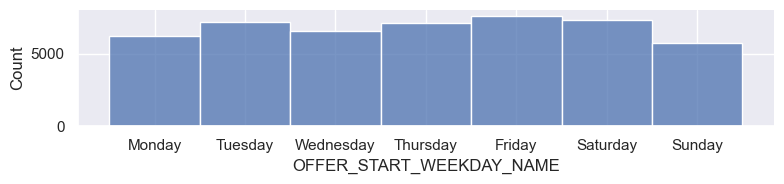

In [159]:
sns.displot(dfTratado.sort_values('OFFER_START_WEEKDAY', ascending=True), x='OFFER_START_WEEKDAY_NAME', height=2 ,aspect= 4)
plt.show()

Olhando para a distribuição da venda, quantiade vendida e percentual de estoque vendido podemos observar que a performance de venda começa melhora na segunda e vai caindo conforme o passar da semana, tendo sua pior performance aos domingos. Tanto em quantidade, quanto em valor vendido.

Aproveitei para abrir o dado em SHIPPING_PAYMENT_TYPE para entender um pouco mais a fundo seu comportamento.
Aparentemente, o SHIPPING_PAYMENT_TYPE NONE vende em maior quantidade, mas em menor ticket, causando uma melhor perfomance no uso do estoque disponibilizado.

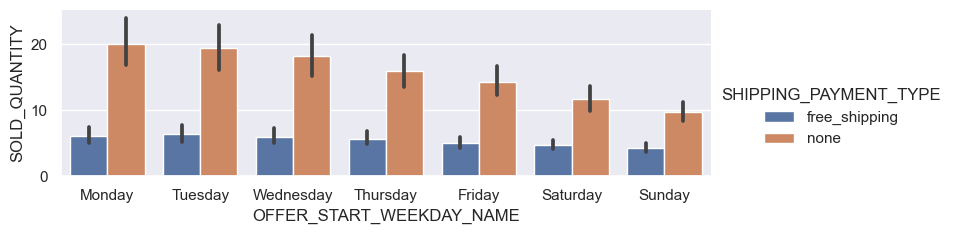

In [160]:
sns.catplot(data=dfTratado.sort_values(by='OFFER_START_WEEKDAY'), x="OFFER_START_WEEKDAY_NAME", y="SOLD_QUANTITY", kind="bar", hue='SHIPPING_PAYMENT_TYPE', height=2.5 ,aspect= 3)
plt.show()

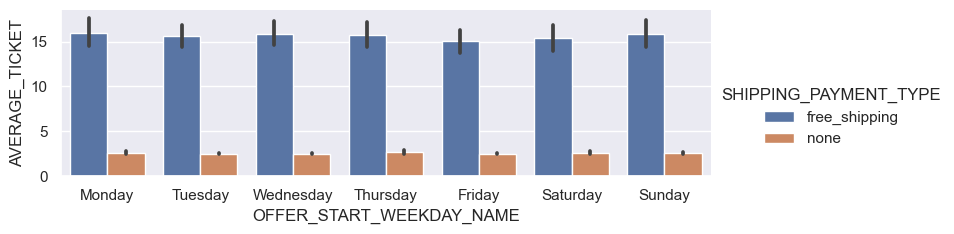

In [161]:
sns.catplot(data=dfTratado.sort_values(by='OFFER_START_WEEKDAY'), x="OFFER_START_WEEKDAY_NAME", y="AVERAGE_TICKET", kind="bar", hue='SHIPPING_PAYMENT_TYPE', height=2.5 ,aspect= 3)
plt.show()

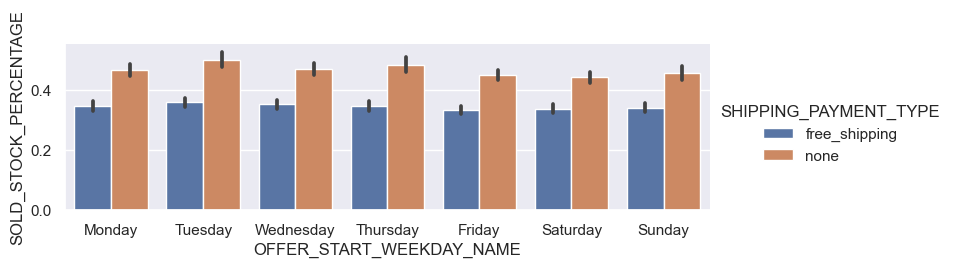

In [162]:
sns.catplot(data=dfTratado.sort_values(by='OFFER_START_WEEKDAY'), x="OFFER_START_WEEKDAY_NAME", y="SOLD_STOCK_PERCENTAGE", kind="bar", hue='SHIPPING_PAYMENT_TYPE', height=2.5 ,aspect= 3)
plt.show()

-----------------------------------

Abrindo os indicadores por Vertical temos os gráficos a seguir:
- A primeira vista, a vertical de BEAUTY & HEALTH parece ser a que mais vende. Porém, como podemos ver na tabela agragada a seguir, se trata de uma estatística inflada por ser a vertical que mais recebe ofertas relâmpago.

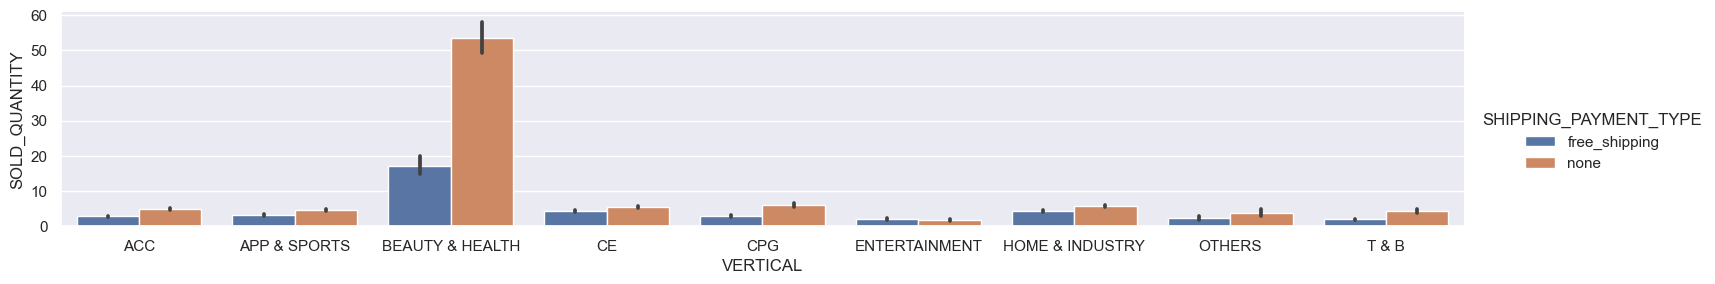

In [163]:
sns.catplot(data=dfTratado, x="VERTICAL", y="SOLD_QUANTITY", kind="bar", hue='SHIPPING_PAYMENT_TYPE', height=3 ,aspect= 5)
plt.show()

Olhando os dados agrupados por vertical podemos ver isso um pouco melhor:
BEAUTY & HEALTH é a vertical que mais vende, tanto em quantiade, quanto em valor.
Porém, é também, a vertical que, apesar de nao ter a maior quantidade de ofertas feitas, é a que mantém maior quanidade de estoque disponível para a oferta.

In [164]:
dfAgrupado = dfTratado.groupby(by=['VERTICAL']).agg(
    
    Ofertas_Feitas=('OFFER_START_DATE', 'count'),
    Estoque_Total_Disponivel=('INVOLVED_STOCK', 'sum'),
    Valor_Venda=('SOLD_AMOUNT', 'sum'),
    Quantidade_Vendida=('SOLD_QUANTITY', 'sum'),
    Tempo_Medio_Oferta_Horas=('OFFER_DURATION_HOURS', 'mean')
    )

dfAgrupado['Percentual_Venda_Estoque'] = dfAgrupado['Quantidade_Vendida']/dfAgrupado['Estoque_Total_Disponivel']

dfAgrupado.round(2)

,Ofertas_Feitas,Estoque_Total_Disponivel,Valor_Venda,Quantidade_Vendida,Tempo_Medio_Oferta_Horas,Percentual_Venda_Estoque
VERTICAL,,,,,,
ACC,2553,24468,26819.98,5156.0,5.38,0.21
APP & SPORTS,13065,238003,131057.02,25651.0,5.74,0.11
BEAUTY & HEALTH,7068,909081,547268.02,178110.0,5.54,0.20
CE,8373,203814,360822.53,21804.0,5.63,0.11
CPG,2631,38589,16753.87,5690.0,5.67,0.15
ENTERTAINMENT,498,3033,1988.57,357.0,5.79,0.12
HOME & INDUSTRY,10822,218857,155412.25,27155.0,5.79,0.12
OTHERS,276,2855,1929.24,357.0,5.57,0.13
T & B,2534,42321,14251.76,2347.0,6.19,0.06


In [165]:
dfAgrupado2 = dfTratado.groupby(['VERTICAL','DOM_DOMAIN_AGG1']).agg(
    
    Ofertas_Feitas=('OFFER_START_DATE', 'count'),
    Estoque_Total_Disponivel=('INVOLVED_STOCK', 'sum'),
    Valor_Venda=('SOLD_AMOUNT', 'sum'),
    Quantidade_Vendida=('SOLD_QUANTITY', 'sum'),
    Tempo_Medio_Oferta_Horas=('OFFER_DURATION_HOURS', 'mean')
    )

dfAgrupado2 = dfAgrupado2[dfAgrupado2['Ofertas_Feitas']>0].reset_index()

dfAgrupado2['Percentual_Venda_Estoque'] = dfAgrupado2['Quantidade_Vendida']/dfAgrupado2['Estoque_Total_Disponivel']

dfAgrupado2.round(2).head(20)

,VERTICAL,DOM_DOMAIN_AGG1,Ofertas_Feitas,Estoque_Total_Disponivel,Valor_Venda,Quantidade_Vendida,Tempo_Medio_Oferta_Horas,Percentual_Venda_Estoque
0,ACC,ACC TOOLS,95,945,987.51,171.0,5.24,0.18
1,ACC,AGRO,1,10,0.00,0.0,6.00,0.00
2,ACC,AUTOPARTS,1691,16651,14905.65,3866.0,5.27,0.23
3,ACC,MOTOPARTS,631,5518,5774.64,803.0,5.78,0.15
4,ACC,VEHICULAR MULTIMEDIA,102,1132,4144.59,288.0,4.89,0.25
5,ACC,WHEELS & TIRES,33,212,1007.59,28.0,4.95,0.13
6,APP & SPORTS,APPAREL,3814,92007,36534.20,7840.0,5.86,0.09
7,APP & SPORTS,APPAREL ACCESORIES,4315,60372,36556.99,7652.0,5.69,0.13
8,APP & SPORTS,FOOTWEAR,1482,22956,20685.71,2120.0,5.75,0.09
9,APP & SPORTS,SPORTS,3263,60492,33118.70,7626.0,5.65,0.13


In [166]:
fig = px.sunburst(dfAgrupado2,
                  path=["VERTICAL", "DOM_DOMAIN_AGG1"],
                  values='Valor_Venda',
                  title="Distribuição da venda por Vertical e Departamento",
                  width=750, height=750)
fig.show()

------------------------------------------------------------------------

In [167]:
#Testando uma lib de report exploratório de dados
prof = ProfileReport(dfTratado)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]